# Exploratory Analysis and Data Cleaning 

In [ ]:
# First import modules that are relevant

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read the training data!
df_train = pd.read_csv("../data/train.csv")

In [ ]:
# And check what it looks like
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### From the dataset, we know that the variables mean 
survival:	Survival	0 = No, 1 = Yes

pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex:	Sex	

Age:	Age in years	

sibsp:	# of siblings / spouses aboard the Titanic	

parch:	# of parents / children aboard the Titanic	

ticket:	Ticket number	

fare:	Passenger fare	

cabin:	Cabin number	

embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [81]:
# We can then check the data types for each column
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [82]:
# We can drop the PassengerId, Name, and Ticket Number columns for our analysis as they don't have any numerical value in determining whether a passenger survived or not
df_train_pruned = df_train.drop(columns = ['PassengerId', 'Ticket', 'Name'])

In [83]:
# Next we can check what columns have null values
df_train_pruned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

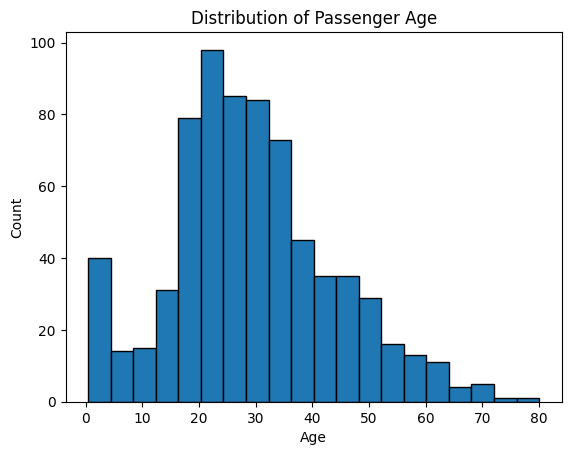

In [84]:
# Let's look at Age
plt.hist(df_train_pruned['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passenger Age')
plt.show()

In [85]:
# It does look somewhat skewed, let's check the mean and median
print(f"Mean Age: {float(df_train_pruned['Age'].mean())}, Median Age: {float(df_train_pruned['Age'].median())}") 

Mean Age: 29.69911764705882, Median Age: 28.0


Although there is not much difference, we can put 28 as a substitution for null values

In [86]:
df_train_pruned['Age'].fillna(df_train_pruned['Age'].median(), inplace=True)

/var/folders/t_/_ffs2h250g193ttskmc3188r0000gn/T/ipykernel_23392/3354587220.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_pruned['Age'].fillna(df_train_pruned['Age'].median(), inplace=True)


In [87]:
# Let's look at Cabin
df_train_pruned['Cabin'].isnull().sum() / len(df_train_pruned['Cabin']) * 100.0

np.float64(77.10437710437711)

We can see that 77% of the Cabin column is null, so we should not use this column at all

In [88]:
# Drop the Cabin column
df_train_pruned = df_train_pruned.drop(columns=['Cabin'])

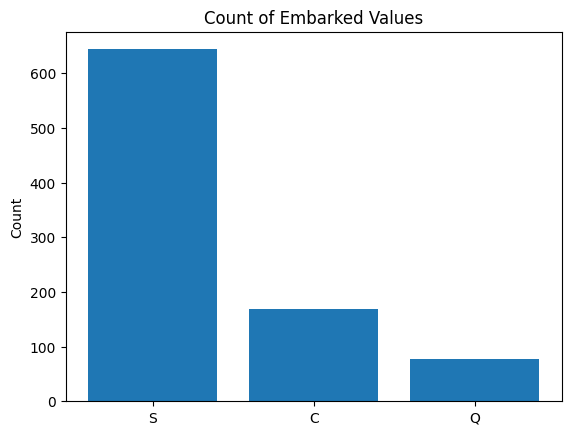

In [89]:
# Let's look at Embarked
embarked_counts = df_train_pruned['Embarked'].value_counts()
plt.bar(embarked_counts.index, embarked_counts.values)
plt.title("Count of Embarked Values")
plt.ylabel("Count")
plt.show()

It seems like more people have the value S. Therefore, we can use S to fill the null values

In [90]:
df_train_pruned['Embarked'].fillna('S', inplace=True)

/var/folders/t_/_ffs2h250g193ttskmc3188r0000gn/T/ipykernel_23392/219461157.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_pruned['Embarked'].fillna('S', inplace=True)


In [91]:
# Updated data set
df_train_pruned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [92]:
# We can also create dummy variables for Sex and Embarked as they are categorial variables
df_train_dummies = pd.get_dummies(df_train_pruned, columns=['Sex', 'Embarked'])
df_train_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [ ]:
# We can actually drop Sex_female and Embarked_C as if the other columns are all False (i.e. Sex_male is False = they are female), then we know it's the control variable
df_train_dummies = df_train_dummies.drop(columns=['Sex_female', 'Embarked_C'])

In [94]:
# Now that we have our columns, we can look for any data trends
df_survived = df_train_dummies[df_train_dummies['Survived'] == 1]
df_did_not_survive = df_train_dummies[df_train_dummies['Survived'] == 0]

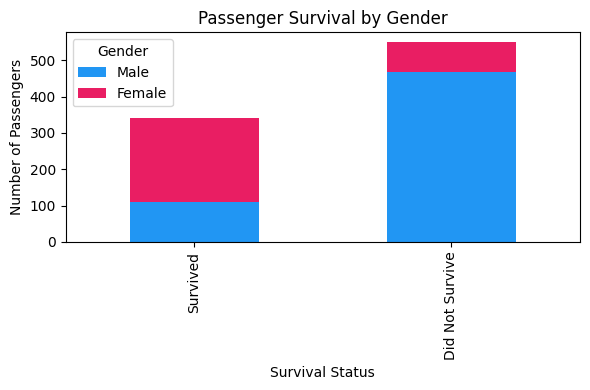

In [174]:
# Plot stacked bar charts for 
survived_gender_counts = df_survived['Sex_male'].value_counts()
did_not_survive_gender_counts = df_did_not_survive['Sex_male'].value_counts()

# Combine into a DataFrame where index = survival status
df_plot = pd.DataFrame({
    'Male': [survived_gender_counts.iloc[1], did_not_survive_gender_counts.iloc[0]],
    'Female': [survived_gender_counts.iloc[0], did_not_survive_gender_counts.iloc[1]]
}, index=['Survived', 'Did Not Survive'])

# Plot stacked bar chart
df_plot.plot(
    kind='bar',
    stacked=True,
    color=['#2196F3', '#E91E63'],  # blue = male, pink = female
    figsize=(6, 4)
)

plt.title('Passenger Survival by Gender')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

We can see that the males had a higher rate of not surviving, which is reasonable as they are more able to help with moving everyone to safety first

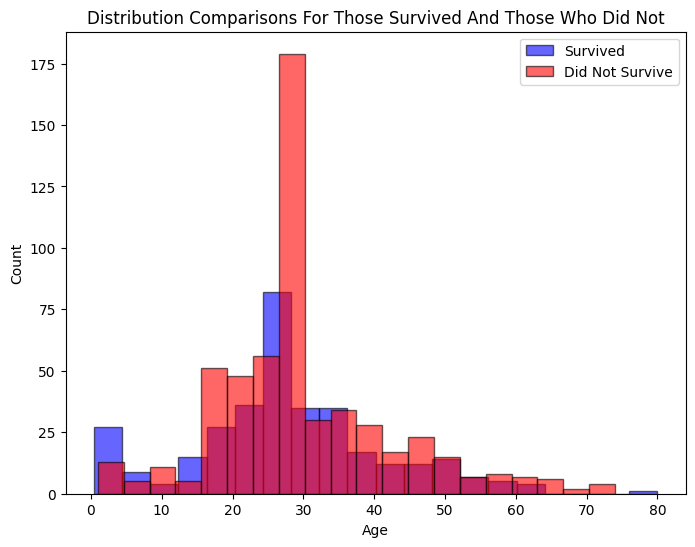

In [95]:
# Plot the two distrbutions for Age
plt.figure(figsize=(8, 6))

plt.hist(df_survived['Age'], bins=20, alpha=0.6, color='blue', label='Survived', edgecolor='black')
plt.hist(df_did_not_survive['Age'], bins=20, alpha=0.6, color='red', label='Did Not Survive', edgecolor='black')

plt.title("Distribution Comparisons For Those Survived And Those Who Did Not")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

We can see from this plot that they have a somewhat equal distribution of being skewed, with the distribution of those that did not survive being slightly older. There is also a huge number of casualties of those in their late 20s, which might be strong male who helped others survive.

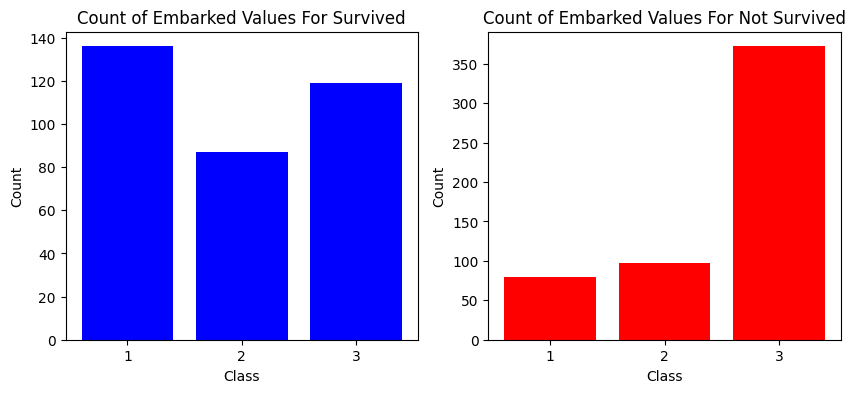

In [ ]:
# Check for class
survived_class_counts = df_survived['Pclass'].value_counts()
did_not_survive_class_counts = df_did_not_survive['Pclass'].value_counts()

# Plot the two bar plots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].bar(survived_class_counts.index, survived_class_counts.values, color='blue')
axes[0].set_title("Count of Embarked Values For Survived")
axes[0].set_xticks([1, 2, 3])
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

axes[1].bar(did_not_survive_class_counts.index, did_not_survive_class_counts.values, color='red')
axes[1].set_title("Count of Embarked Values For Not Survived")
axes[1].set_xticks([1, 2, 3])
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.show()


We can see that for those that did survive, there is not an outright pattern in how class mattered. However, for those who didn't survive, the 3rd class passengers were the most affected.

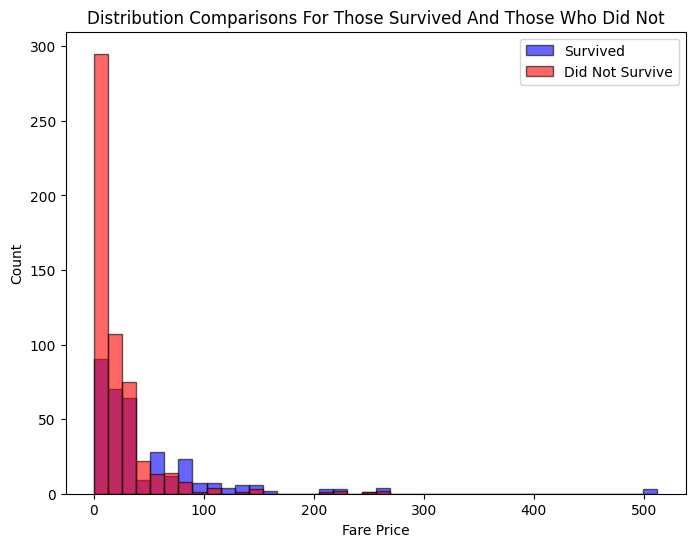

In [ ]:
# We can check for the fare prices
plt.figure(figsize=(8, 6))

# Make the bins the same width
same_bins = np.histogram(np.hstack((df_survived['Fare'],df_did_not_survive['Fare'])), bins=40)[1]

plt.hist(df_survived['Fare'], bins=same_bins, alpha=0.6, color='blue', label='Survived', edgecolor='black')
plt.hist(df_did_not_survive['Fare'], bins=same_bins, alpha=0.6, color='red', label='Did Not Survive', edgecolor='black')

plt.title("Distribution Comparisons For Those Survived And Those Who Did Not")
plt.xlabel("Fare Price")
plt.ylabel("Count")
plt.legend()
plt.show()

In the histogram, there is no clear trend in the fare prices mattering to the survivability of the passenger, but we can see that there are certain higher fare prices (> $50) where there are more survivability

SibSp and Parch might introduce multicollineary as they both are 0 if the traveler is alone. Therefore, we can just create a new variable to replace these two to check whether the traveler was alone

In [98]:
# Create the new Alone column
df_train_dummies['Alone'] = np.where((df_train_dummies['SibSp']+df_train_dummies['Parch'])>0, 0, 1)
# Drop the unncessary columns
df_train_dummies = df_train_dummies.drop(columns=['SibSp', 'Parch'])

In [99]:
# We get our final model
df_train_dummies.head()

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Alone
0,0,3,22.0,7.2500,True,False,True,0
1,1,1,38.0,71.2833,False,False,False,0
2,1,3,26.0,7.9250,False,False,True,1
3,1,1,35.0,53.1000,False,False,True,0
4,0,3,35.0,8.0500,True,False,True,1


In [ ]:
# Let's make a method that will transform this data for any new data with the same format

def clean_data(input_data_location):
    '''Given the path to a csv file, read it and transform the data for logistic regression'''

    # Read the intial csv file
    df = pd.read_csv(input_data_location)
    # Drop the unncessary columns
    df = df.drop(columns = ['PassengerId', 'Ticket', 'Name', 'Cabin'])
    # Fill the null values
    df.fillna({'Age': df['Age'].median()}, inplace=True)
    df.fillna({'Embarked': 'S'}, inplace=True)

    # Added after test set had null Fare value
    df.fillna({'Fare': df['Fare'].median()}, inplace=True)

    # Standardize gender values to all lower case 
    df['Sex'] = df['Sex'].str.lower()

    # Get dummy variables
    df = pd.get_dummies(df, columns=['Sex', 'Embarked'])
    # Drop the redundant variable
    df = df.drop(columns=['Sex_female', 'Embarked_C'])
    # Create the new Alone column
    df['Alone'] = np.where((df['SibSp']+df['Parch'])>0, 0, 1)
    # Drop the unncessary columns
    df = df.drop(columns=['SibSp', 'Parch'])

    # Return the final dataframe
    return df
    

In [177]:
# Run the clean_data() method
df_train_method = clean_data("../data/train.csv")
df_test_method = clean_data("../data/test.csv")

In [178]:
# Let's do a final check on the test file to see if there are missing values
df_test_method.isnull().sum()

PassengerId    0
Pclass         0
Age            0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
Alone          0
dtype: int64

In [179]:
# There is a missing Fare row, let's fill it with the median as we saw that the data is skewed
df_test_method.fillna({'Fare': df_test_method['Fare'].median()}, inplace=True)

In [180]:
# After updating the method, let's run it again
df_train_method = clean_data("../data/train.csv")
df_test_method = clean_data("../data/test.csv")

### Now let's run Logistic Regression on the model

In [181]:
# Import the logistic regression library from sklearn
from sklearn.linear_model import LogisticRegression

In [182]:
# Divide the data by the training and test set 
X_train = df_train_method[['Pclass', 'Age', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Alone']]
y_train = df_train_method['Survived']

X_test = df_test_method[['Pclass', 'Age', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Alone']]

In [183]:
# Use the logistic regression model to fit the training data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [184]:
# And predict the test data!
y_pred = model.predict(X_test)

In [185]:
# Add the column of prediction to the test dataset
df_test_method['Predicted Survived'] = y_pred

In [186]:
# Calculate the percentage of those who have survived
float(np.round(df_test_method['Predicted Survived'].value_counts()[1] / len(df_test_method) * 100.0, 2))

38.28

38.28% of people in the test data is predicted to have survived...

Through Kaggle, the accuracy score is 0.76555